In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

sns.set_style()

# Fomatação do Pandas
pd.options.display.float_format='{:.2f}'.format

# Ignorando erros
import warnings
warnings.filterwarnings("ignore")

In [133]:
def limpa_dados_meses(url_data, url_scrapper, meses):
# Primeira Parte: Buscando os dados do banco de dados do github do módulo 1
    df = pd.read_csv(url_data, encoding= 'ISO-8859-1', sep=';', skiprows=3, skipfooter=12,error_bad_lines= False, thousands='.',decimal=',', engine = 'python')

#Quantidade de meses passados que queremos analisar
    col = [df.columns[0]]
    for i in range(meses):
        col.append(df.columns[-(i+2)])

    # Pegando os valores da primeira coluna do dataframe original e os valores da penultima coluna, pois sabemos que a última se trata da soma total para o estado
    gastos_recentes = df[col]
    gastos_recentes[gastos_recentes.columns[0]] = gastos_recentes[gastos_recentes.columns[0]].str[3:]
    # Organizando de forma decrescente tendo como referência a última coluna do dataframe
    gastos_recentes = gastos_recentes.sort_values(by=gastos_recentes.keys()[1], ascending= False)

    # Ordenando de forma decrescente os Estados
    gastos_recentes = gastos_recentes.set_index(gastos_recentes.columns[0])


# Segunda Parte: Partindo agora para a segunda parte que é pegar os dados da Wikipedia
    tables = pd.read_html(url_scrapper, match ='População')
    populacao = pd.DataFrame(tables[0])
    populacao = populacao.drop([populacao.keys()[0],populacao.keys()[-2],populacao.keys()[-1]], axis = 1)
    populacao['População'] = populacao['População'].str.replace(" ", "").astype(int)
    populacao = populacao.set_index(populacao.keys()[0])
    populacao.index.names = ['UF']

# Retornando o dataset do Wikipedia e também o dataset com a coluna dos gastos mais recentes
    return populacao, populacao.join(gastos_recentes)

In [134]:
url_data = "https://raw.githubusercontent.com/dragoc1/Bootcamp_Data_Science_Aplicada/main/Modulo01/dados/A170937189_28_143_208.csv"

df = pd.read_csv(url_data, encoding= 'ISO-8859-1', sep=';', skiprows=3, skipfooter=12,error_bad_lines= False, thousands='.',decimal=',', engine = 'python')
df = df.set_index(df['Unidade da Federação'].str[3:])
df = df.drop(columns = ['Unidade da Federação','Total'])

In [135]:
mensal = df.T
mensal.tail()

Unidade da Federação,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,...,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
2020/Nov,9357946.29,3276590.1,19895617.91,3621031.05,39004315.8,2218532.26,527840.46,31942670.33,18911604.5,56916499.66,...,32030401.25,86776500.97,335084865.66,126859051.02,68460616.55,108853890.98,22023126.25,20506039.58,43037600.45,20459325.27
2020/Dez,8880836.55,3696997.31,17765167.69,3454460.94,38015145.79,2566919.6,675277.05,30783403.58,20883972.79,50849353.22,...,33674687.78,90416725.95,330489045.98,120037066.76,70333079.37,111760506.8,19629591.55,19583803.46,44147353.21,22991567.76
2021/Jan,9266014.59,3715723.12,21430289.17,3266928.47,38354682.46,2802886.34,419553.49,30738750.31,22689390.32,52078218.88,...,39642483.39,94179674.42,355149525.6,122122779.12,71970474.56,119992419.94,21693311.15,19120141.68,46127763.88,23527050.29
2021/Fev,7730597.04,3538427.92,25917134.55,3519773.73,37688314.23,2817849.31,319160.87,30924484.99,19400269.01,53171253.41,...,40243896.2,85583557.95,348827130.99,132622112.72,74337524.03,111797400.7,24337295.63,18349376.92,42742773.93,22766952.62
2021/Mar,11023309.47,4077045.92,22032176.22,3985530.08,33276392.89,3188210.98,1357751.33,39663677.48,20018325.75,62079618.54,...,45490499.45,106837295.81,392946147.42,140264608.52,81376630.57,130155185.16,25168195.34,19611032.61,45592686.49,31831917.45


<AxesSubplot:ylabel='São Paulo'>

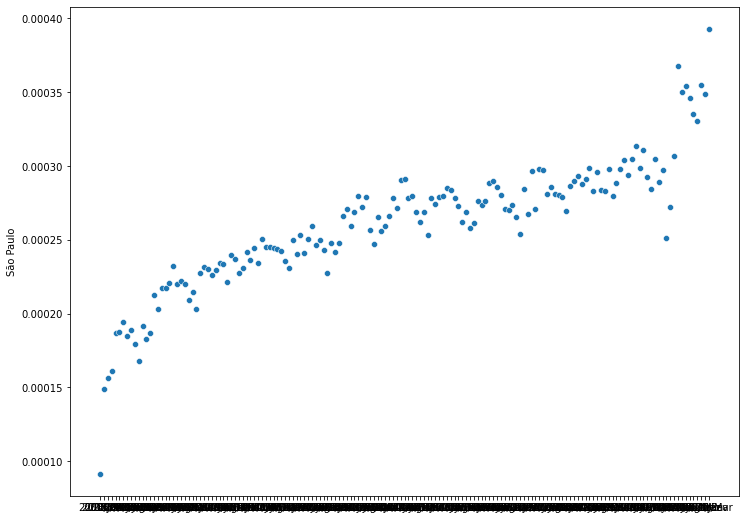

In [143]:
# Input's necessários para o plot
data = mensal
x = mensal.index
y = 'São Paulo'
mensal[y] = mensal[y].astype(float)/1e6

# Criação da figura 
fig, ax = plt.subplots(figsize = (12,9))
sns.scatterplot(data = data, x = x, y = y)

O eixo X ficou completamente poluido por causa da quantidade de meses que possuimos.

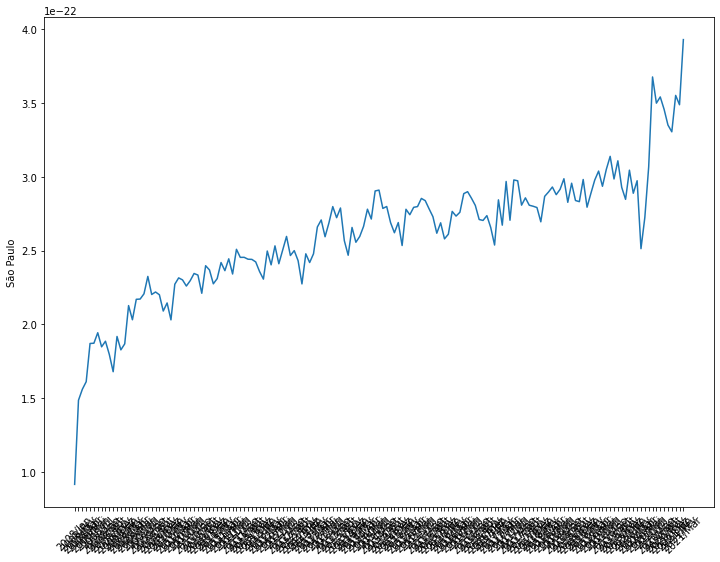

In [147]:
# Input's necessários para o plot
data = mensal
x = mensal.index
y = 'São Paulo'
mensal[y] = mensal[y].astype(float)/1e6

# Criação da Figura
fig, ax = plt.subplots(figsize = (12,9))
sns.lineplot(data = data, x = x, y = y)
plt.xticks(rotation = 45)
plt.show()

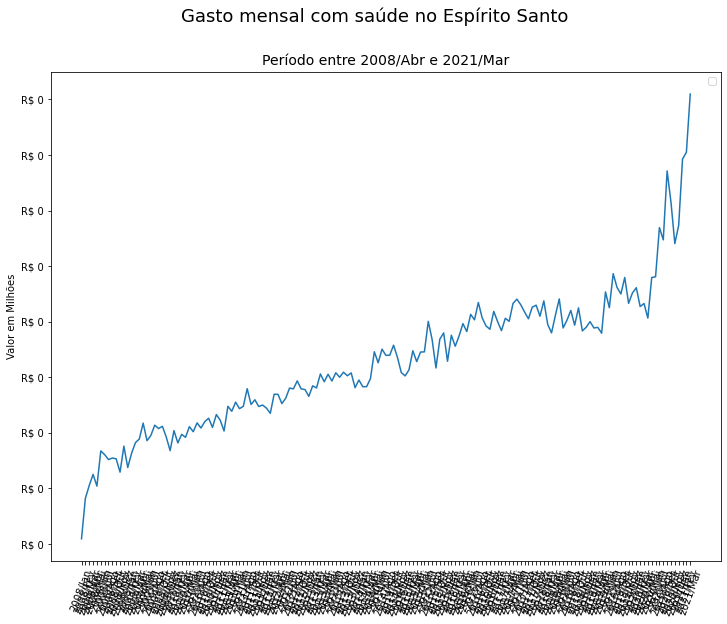

In [141]:
# Input's necessários para o plot
data = mensal
x = mensal.index
y = 'Espírito Santo'
mensal[y] = mensal[y].astype(float)/1e6

fig, ax = plt.subplots(figsize = (12,9))


sns.lineplot(data = data, x = x, y = y)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.0f}"))
ax.set_xlabel('')
ax.set_ylabel('Valor em Milhões')

plt.suptitle('Gasto mensal com saúde no '+ y , fontsize = 18)
plt.title('Período entre {} e {}'.format(mensal.index.min(),mensal.index.max()), fontsize = 14)
plt.xticks(rotation = 70)
plt.legend('')
plt.show()

In [137]:
#sns.lineplot(data = mensal, x = mensal.index, y = "São Paulo");

# Desafio 01: Fazer o scatter plot feito em aula para o seu estado, leia um pouco da documentação sobre este gráfico e teste alguns parâmetros.

In [138]:
#mensal['Espírito Santo'] = mensal['Espírito Santo'].astype(float)
#mensal['Espírito Santo'] = mensal['Espírito Santo'].astype(float)/1e6

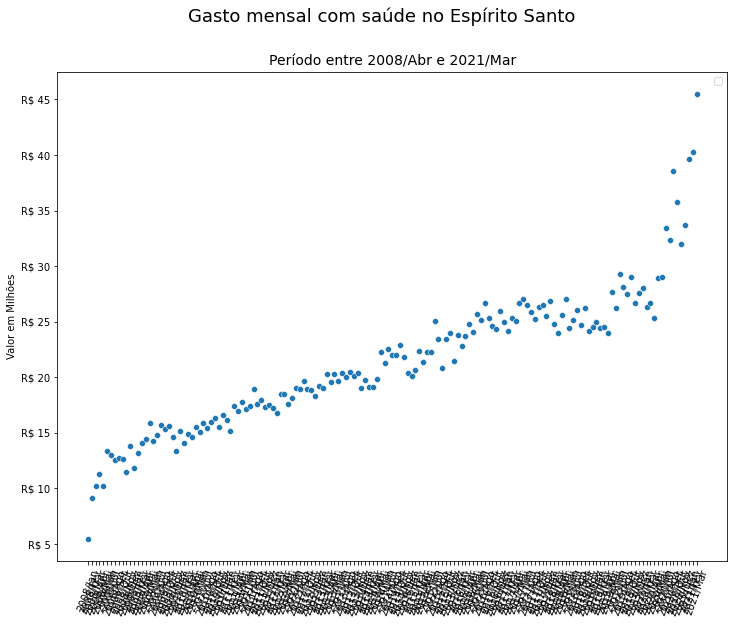

In [139]:
# Input's necessários para o plot
data = mensal
x = mensal.index
y = 'Espírito Santo'
mensal[y] = mensal[y].astype(float)/1e6

fig, ax = plt.subplots(figsize = (12,9))


sns.scatterplot(data = data, x = x, y = y)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.0f}"))
ax.set_xlabel('')
ax.set_ylabel('Valor em Milhões')

plt.suptitle('Gasto mensal com saúde no '+ y , fontsize = 18)
plt.title('Período entre {} e {}'.format(mensal.index.min(),mensal.index.max()), fontsize = 14)
plt.xticks(rotation = 70)
plt.legend('')
plt.show()